# Setup

## Imports

**Note**: the requirements are listed in the requirements.txt file in the project. 

In [ ]:
import pandas as pd 
import gensim.downloader as gensim_api
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from wefe.datasets import load_weat
from wefe.metrics import WEAT
from wefe.query import Query
from wefe.word_embedding_model import WordEmbeddingModel

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import utils


plt.style.use('ggplot')

spoke_colors = ['#FFC1C1', '#49486C', '#D0DFFB', '#FFF2D1']

## Download Word Embeddings 

In [ ]:
utils.list_all_pretrained_models()

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
google_news_300 = gensim_api.load("word2vec-google-news-300")

In [ ]:
model = WordEmbeddingModel(google_news_300, "word2vec google-news dim=300")

NameError: name 'google_news_300' is not defined

In [ ]:
plot_words = ['marriage', 'wedding', "she", "he" ,"executive",
            "business" ]

In [ ]:
user_input = ["gender"]

In [ ]:

utils.display_pca_scatterplot_3D(google_news_300, user_input, plot_words)

## Prepare Query

 The WEFE library Fairness Measures receive queries as input, with each query formed by a target and attribute words.

 * The **target words** describe the social groups in which fairness is intended to be measured (e.g. African Americans, Women, Sikhs)
 * The **attribute words** describe traits or attitudes by which a bias towards one of the social groups may be exhibited (e.g., pleasant vs. unpleasant terms)


 **Note**: Here we are only looking at two genders for the sake of simplicty, of course gender is not a binary concept!

In [ ]:
gender_query = Query(
    target_sets=[
        ["female", "woman", "girl", "sister", "she", "her", "hers", "daughter"],
        ["male", "man", "boy", "brother", "he", "him", "his", "son"],
    ],
    attribute_sets=[
        [
            "home",
            "parents",
            "children",
            "family",
            "cousins",
            "marriage",
            "wedding",
            "relatives",
        ],
        [
            "executive",
            "management",
            "professional",
            "corporation",
            "salary",
            "office",
            "business",
            "career",
        ],
    ],
    target_sets_names=["Female terms", "Male Terms"],
    attribute_sets_names=["Family", "Careers"],
)

print(gender_query)

<Query: Female terms and Male Terms wrt Family and Careers
- Target sets: [['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives'], ['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']]
- Attribute sets:[['female', 'woman', 'girl', 'sister', 'she', 'her', 'hers', 'daughter'], ['male', 'man', 'boy', 'brother', 'he', 'him', 'his', 'son']]>


### WEAT Word Sets

In [ ]:
weat_wordsets = load_weat()

In [ ]:
weat_wordsets.keys()

dict_keys(['flowers', 'insects', 'pleasant_5', 'unpleasant_5', 'instruments', 'weapons', 'european_american_names_5', 'african_american_names_5', 'european_american_names_7', 'african_american_names_7', 'pleasant_9', 'unpleasant_9', 'male_names', 'female_names', 'career', 'family', 'math', 'arts', 'male_terms', 'female_terms', 'science', 'arts_2', 'male_terms_2', 'female_terms_2', 'mental_disease', 'physical_disease', 'temporary', 'permanent', 'young_people_names', 'old_people_names'])

# Bias Measurement

Read the [documentation](https://wefe.readthedocs.io/en/latest/api.html) for the various mesaures that WEFE provides. 

## WEAT

* The closer its value is to 0, the less biased the model is, values usually lie between 0 and 2
* The more positive the value given by the WEATscore, the more the target set 1 will be related to attribute set 1 and second target set 2 to attribute set 2
* You can return the p-value with parameters `calculate_p_value = True,p_value_iterations=1000`



In [ ]:
metric = WEAT()
result = metric.run_query(gender_query, model)
print(result)

{'query_name': 'Female terms and Male Terms wrt Family and Careers', 'result': 0.46343880688073114, 'weat': 0.46343880688073114, 'effect_size': 0.45076526581093423, 'p_value': nan}


# Visualising Bias

In [ ]:
result_df = pd.DataFrame([result])
result_df

,query_name,result,weat,effect_size,p_value
0,Female terms and Male Terms wrt Family and Car...,0.463439,0.463439,0.450765,NaN


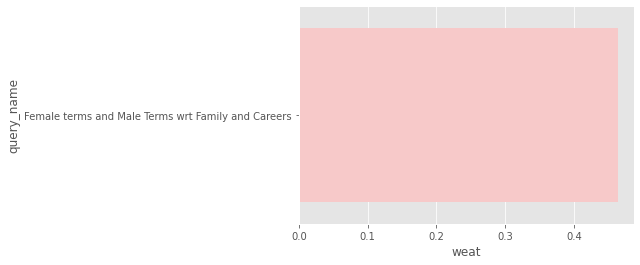

In [ ]:
sns.barplot(x = "weat", y = "query_name", data = result_df, color=spoke_colors[0])
plt.show()

**Useful Hint**: 

Can run several queries via run_queries (e.g. `from wefe.utils import run_queries`)
and plot an compare results with:
```
from wefe.utils import plot_queries_results
plot_queries_results(result_df)

# Exercises

1. Measure & Visualise the bias for a set of target and Attribute words that you choose (can use examples from the WEAT wordsets or your own)
2. Compare the bias across two word-embeddings and discuss a hypothesis of why they may be different
3. Measure bias using another metric from the WEFE library and explain it's concept in a couple of sentences

* Relative Norm Distance (RND)
* Relative Negative Sentiment Bias (RNSB)
* Mean Average Cosine (MAC)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d2871a92-4e31-4482-a3e9-30cad94e9005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>